## Abstract

Over the past 7 years, the Black Lives Matter movement has moved into the spotlight. During June of 2020, the movement saw itself on the world's stage as cities around the world marched in protest against the murder of George Floyd. As Black Lives Matter has gained media attention, different perspectives on it have also gained popularity. There are some who believe that Black Lives Matter is another wave of the Civil Rights movement from the 1960s. There are others who believe Black Lives Matter is actually a terrorist organization and is partnered with Antifa to overthrow the government. In order to better understand Black Lives Matter, I wanted to see what their messaging actually entailed. I scraped twitter data over the past 7 years since Black Lives Matter was first created by pulling tweets that had the hashtag BLM.

I recognized that those that used the hashtag might not necessarily be a part of Black Lives Matter and could even be against it. I felt it was important to gather all sides and see what rose to the surface when analyzing the text used. I also recognized that because people have the ability to delete tweets, the compilation of tweets, especially those posted before 2020, is incomplete. 

With those acknowledgements, I was able to obtain 220,504 tweets from over 140,000 Twitter users. After cleaning the tweets, I first ran a sentiment analysis using both VADER and TextBlob. While it was interesting to see how both were able to define the sentiment for the tweets, it actually became inconclusive when it came to the context of the tweets. Just because a tweet itself seemed to have negative sentiment didn't mean that it was negative towards the BLM movement. Therefore, I looked at the words used in the tweets to get a better idea of the messaging of BLM. I found the top 50 words, bigrams, and trigrams (multiple words used together). Of those, the significant finding with looking at trigrams found that the phrases "justice peace blm", "protect black women", "protect black men", and "protect black child" were the most prominent. With the bigrams, "blm antifa" was the 9th most common bigram. 

This was helpful but it was time to dig deeper. I completed both a Latent Semantic Analysis (LSA) and a Latent Dirchelet Allocation(LDA). Both of these are topic modeling and pull out the common topics found in the text. For the LSA, there were 4 topics that the tweets were clustered around: "Black People Life", "George Floyd Justice", "Protest Today Peaceful", and "Justice Change Sign". For LDA the topics were classified based on the top 50 words associated with each: "Black Lives Matter", "Names of People and Places", "Politics", and "Protests, Riots, Racism". I also ran a test to see which words were most influential on the sentiment scoring.

Based upon these analyses, the messages of the Black Lives Matter movement on Twitter is focused on protecting black people - based on the bigrams and LDA and LSA as well as calls for justice. There isn't a strong connection with the word Antifa as much as one would think based upon the media's portrayal.

Applicability would be to measure this analysis against the words and phrases used by media to see the similarities and differences. This approach can be applied to individuals, groups, and companies who are looking to check how they are being perceived on Twitter and if the messages that they are pushing are coming through. 


## Table of Contents

This notebook is organized using the OSEMN. Use the links below to navigate to different parts of the notebook.<br />

1. [Obtain the Data](#Section1)<br />
2. [Scrub the Data](#Section2)<br />
3. [Explore the Data](#Section3)<br />
a. [Sentiment Analysis](#Section3a) <br />
b. [Time Analysis](#Section3b) <br />
c. [Word Analysis](#Section3c) <br />
4. [Model the Data](#Section4)<br />
5. [iNterpret the Data](#Section5)<br />

## 1. Obtain the Data
<a id="Section1"></a>
Data was obtained using the twint library. I am not included that direct code here as it will make this __[notebook](https://drive.google.com/file/d/165vOvt2XrFNWwK0m2iZSz35KV4PojxRc/view?usp=sharing)__ too large.

Here is an example of how I ran the scraping function:
#### Necessary Libraries for Scraping
import twint  <br />
import nest_asyncio  <br />
import pandas as pd  <br />
nest_asyncio.apply()

#### Functions 
def available_columns():  <br />
    &emsp;return twint.output.panda.Tweets_df.columns  <br />
def twint_to_pandas(columns):  <br />
    &emsp;return twint.output.pandas.Tweets_df[columns]
    
#### Twint Initialization and Execution
c = twint.Config() <br />
c.Search = "#BLM"  <br />
c.Lang = "en"  <br />
c.Media = False  <br />
c.Format = "Username: {username} | Tweet: {tweet}"  <br />
c.Pandas = True  <br />
c.Since = "2014-01-01 00:00:00"  <br />
c.Until = "2014-12-31 23:59:59"  <br />

twint.run.Search(c)

#### Storing the Data into csvs
available_columns()

blm_2014 = twint_to_pandas(['date', 'hashtags', 'nlikes', 'tweet', 'username']  <br />
blm_2014.to_csv('BLM_2014_tweets.csv')

## 2. Scrub the Data
<a id="Section2"></a>
I have a separate  __[notebook](https://github.com/roweyerboat/Capstone_Project/blob/master/BLM%20Tweet%20Cleaning.ipynb)__ as well that contains the data cleaning process. <br />
Here are the steps I completed in cleaning the tweet text:
1. Remove rows with missing information - each column < 10 Nans
2. Remove urls and the specific url used for uploading pictures on twitter
3. Remove punctuation 
4. Tokenize the text
5. Remove the stopwords from the nltk corpus for English stopwords
6. Stem the text using PorterStemmer
7. Lemmatize the text using nltk.WordNetLemmatizer
8. Checked again for missing information and removed Nans
9. Changed the date column to be datetime object
10. Changed the nlikes column to be numerical

## 3. Explore the Data 

<a id="Section3"></a>

In [1]:
# Importing Libraries for exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import re
from IPython.display import display, Markdown
from nltk.sentiment.util import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
matplotlib.style.use('bmh')
%matplotlib inline
import glob
import config
import warnings
warnings.filterwarnings('ignore')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [2]:
# Importing the Cleaned Data and Adjusting data types
blm_tweets = pd.read_csv('Cleaned_BLM_Tweets.csv', index_col=0)
blm_tweets['date'] = pd.to_datetime(blm_tweets['date'], infer_datetime_format=True, errors='coerce')
blm_tweets['nlikes'] = pd.to_numeric(blm_tweets['nlikes'], errors='coerce')
blm_tweets = blm_tweets.dropna()
blm_tweets = blm_tweets.drop_duplicates()
blm_tweets['len'] = np.array([len(tweet) for tweet in blm_tweets['tweet']])
blm_tweets.head()

date                                           hashtags  \
0 2020-06-24 16:59:09                                           ['#blm']   
1 2020-06-24 16:52:19                   ['#poem', '#motivation', '#blm']   
2 2020-06-24 16:47:56                                           ['#blm']   
3 2020-06-24 16:46:02                                           ['#blm']   
4 2020-06-24 16:43:54  ['#auspol', '#blm', '#racismeantiblancs', '#vi...   

   nlikes                                              tweet         username  \
0    20.0                        NO JUSTICE, NO PEACE #BLM        satanic_syd   
1   206.0  Funny thing\nAbout life is\nYou’ll always be t...   derickijohnson   
2    23.0  PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...  AngelofLightLit   
3   147.0  My kid wrote #blm in chalk on my driveway and ...      Majhatesall   
4    24.0  Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...      CaroDiRusso   

                                         tweet_punct  \
0                          NO JUSTICE NO PEACE BLM     
1  Funny thing\nAbout life is\nYou’ll always be t...   
2  PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...   
3  My kid wrote blm in chalk on my driveway and I...   
4  Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...   

                                     tweet_tokenized  \
0        ['no', 'justice', 'no', 'peace', 'blm', '']   
1  ['funny', 'thing', 'about', 'life', 'is', 'you...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   

                                       tweet_nonstop  \
0                    ['justice', 'peace', 'blm', '']   
1  ['funny', 'thing', 'life', 'always', 'one', 'e...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   

                                       tweet_stemmed  \
0                      ['justic', 'peac', 'blm', '']   
1  ['funni', 'thing', 'life', 'alway', 'one', 'el...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...   
4  ['genuflect', 'prostrat', 'repent', 'repeat', ...   

                                    tweet_lemmatized  len  
0                    ['justice', 'peace', 'blm', '']   27  
1  ['funny', 'thing', 'life', 'always', 'one', 'e...  264  
2  ['protect', 'black', 'woman', 'protect', 'blac...   65  
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...  278  
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   96

In [3]:
blm_tweets.dtypes

date                datetime64[ns]
hashtags                    object
nlikes                     float64
tweet                       object
username                    object
tweet_punct                 object
tweet_tokenized             object
tweet_nonstop               object
tweet_stemmed               object
tweet_lemmatized            object
len                          int64
dtype: object

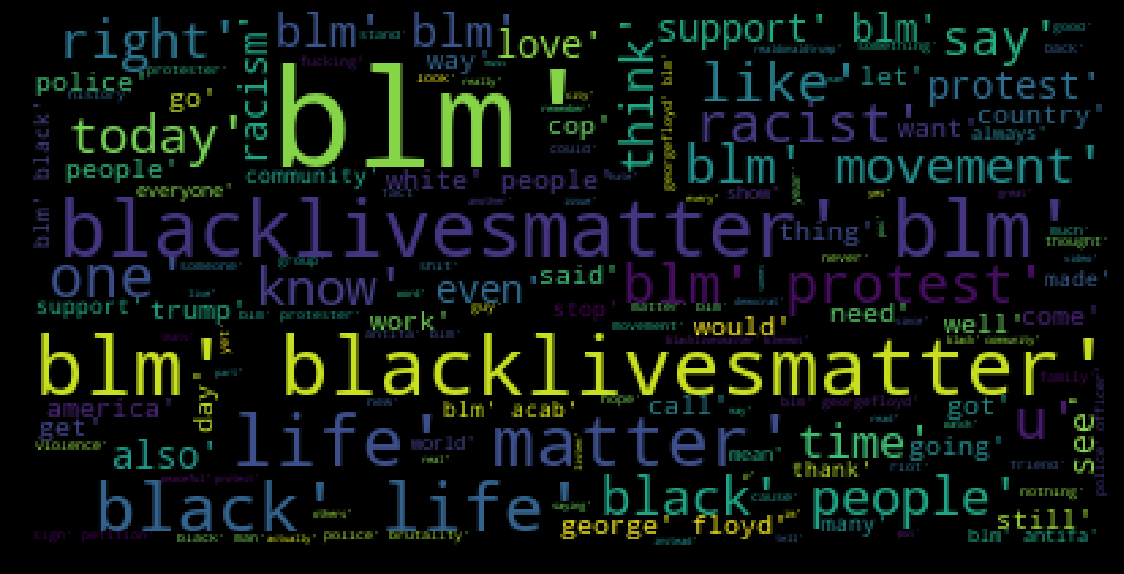

In [4]:
# Visualizing the words using WordCloud
def wordcloud(tweets, col):
    '''The function takes in two input values the first is the dataframe you want to use and the second is the column in '' you want to make a wordcloud of the words in the specified column'''
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color = "black", stopwords=stopwords, random_state=2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud(blm_tweets, 'tweet_lemmatized')

In [5]:
mean = np.mean(blm_tweets['len'])
print("The average length of the tweets: {} words.".format(round(mean),2))

The average length of the tweets: 170.0 words.


In [6]:
# Highlighting the tweet with the most likes
fav_max = np.max(blm_tweets['nlikes'])

fav = blm_tweets[blm_tweets['nlikes'] == fav_max].index[0]

print("The tweet with the most likes is: \n{}".format(blm_tweets['tweet'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(blm_tweets['len'][fav]))

The tweet with the most likes is: 
This man is on one knee. Bearing his heart & his soul. He possesses pain they could never know. Anger they could never fathom. Yet he is on one knee, pleading, peacefully. And he is taken away in handcuffs. This has to stop #BLM  
Number of likes: 234401.0
230 characters.



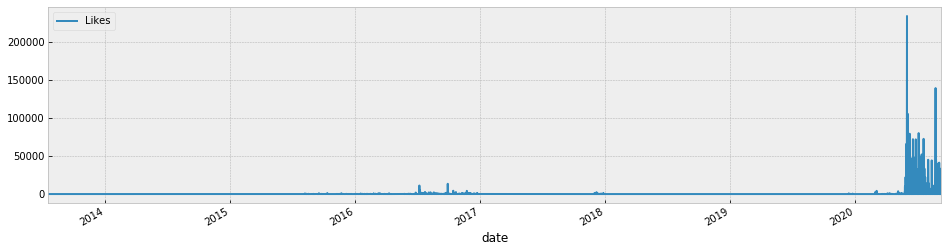

In [7]:
# Likes over time
tfav = pd.Series(data=blm_tweets['nlikes'].values, index=blm_tweets['date'])
tfav.plot(figsize=(16,4), label="Likes", legend=True)

In [8]:
# Adjusting the dataframe to have years and months represented
blm_tweets['year'] = blm_tweets['date'].dt.strftime('%Y')
blm_tweets['month'] = blm_tweets['date'].dt.strftime('%m')

In [9]:
blm_tweets['hashtags'].value_counts()

['#blm']                                                                                                                                                                     84074
['#blacklivesmatter', '#blm']                                                                                                                                                 4319
['#blm', '#blacklivesmatter']                                                                                                                                                 4175
['#blm', '#blacklivesmatter', '#blmnews']                                                                                                                                     1615
['#happyjune2020', '#blm', '#followme', '#ifb', '#teamsil', '#f4f', '#retweet', '#ifollowbackinstantly', '#takipclub', '#1first', '#teamstallion', '#1ddrive', '#resist']      911
                                                                                                         

In [10]:
blm_tweets['username'].value_counts()

BLM_Report        1635
hungrybowtie      1180
DrLindaShelton    1170
djtroops           912
blacklionmusic     803
                  ... 
maroonajambo         1
hmdturtle            1
Ersonrob             1
cujo_aggrieved       1
VANNIEKOOTOOR        1
Name: username, Length: 140012, dtype: int64

In [11]:
blm_tweets.describe()

nlikes            len
count  220504.000000  220504.000000
mean       53.011156     169.516943
std       969.974984      80.491689
min         0.000000       9.000000
25%         0.000000     100.000000
50%         1.000000     167.000000
75%        18.000000     251.000000
max    234401.000000     339.000000

### Sentiment Analysis

<a id="Section3a"></a>
So it looks like based on the graph and these that the tweet that got 234,401 likes is a definite outlier and most tweets get somewhere between 0 and 18 likes. Also the tweet length changed on twitter from 140 to 280. I'm not sure how there is a tweet with 339 words.

In [12]:
# VaderSentiment Analyser Initialization
analyser = SentimentIntensityAnalyzer()

def analyze_text(input_text, analyzer):
    '''
    This takes two inputs, the input text and the analyzer you want to use. The output is the sentiment score based on the analyzer used.'''
    if analyzer == 'VADER':
        result = analyser.polarity_scores(input_text)
        score = result['compound']
    elif analyzer == 'TextBlob':
        score = TextBlob(input_text).sentiment.polarity
    return score

In [13]:
# Adding columns with the polarity scores from the VADER and TextBlob sentiment analyzers
blm_tweets['vader_sent'] = blm_tweets['tweet_lemmatized'].apply(analyze_text, analyzer='VADER')
blm_tweets['textblob_sent'] = blm_tweets['tweet_lemmatized'].apply(analyze_text, analyzer='TextBlob')
blm_tweets.head()

date                                           hashtags  \
0 2020-06-24 16:59:09                                           ['#blm']   
1 2020-06-24 16:52:19                   ['#poem', '#motivation', '#blm']   
2 2020-06-24 16:47:56                                           ['#blm']   
3 2020-06-24 16:46:02                                           ['#blm']   
4 2020-06-24 16:43:54  ['#auspol', '#blm', '#racismeantiblancs', '#vi...   

   nlikes                                              tweet         username  \
0    20.0                        NO JUSTICE, NO PEACE #BLM        satanic_syd   
1   206.0  Funny thing\nAbout life is\nYou’ll always be t...   derickijohnson   
2    23.0  PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...  AngelofLightLit   
3   147.0  My kid wrote #blm in chalk on my driveway and ...      Majhatesall   
4    24.0  Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...      CaroDiRusso   

                                         tweet_punct  \
0                          NO JUSTICE NO PEACE BLM     
1  Funny thing\nAbout life is\nYou’ll always be t...   
2  PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...   
3  My kid wrote blm in chalk on my driveway and I...   
4  Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...   

                                     tweet_tokenized  \
0        ['no', 'justice', 'no', 'peace', 'blm', '']   
1  ['funny', 'thing', 'about', 'life', 'is', 'you...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   

                                       tweet_nonstop  \
0                    ['justice', 'peace', 'blm', '']   
1  ['funny', 'thing', 'life', 'always', 'one', 'e...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   

                                       tweet_stemmed  \
0                      ['justic', 'peac', 'blm', '']   
1  ['funni', 'thing', 'life', 'alway', 'one', 'el...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...   
4  ['genuflect', 'prostrat', 'repent', 'repeat', ...   

                                    tweet_lemmatized  len  year month  \
0                    ['justice', 'peace', 'blm', '']   27  2020    06   
1  ['funny', 'thing', 'life', 'always', 'one', 'e...  264  2020    06   
2  ['protect', 'black', 'woman', 'protect', 'blac...   65  2020    06   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...  278  2020    06   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   96  2020    06   

   vader_sent  textblob_sent  
0      0.7845       0.000000  
1      0.9081       0.366667  
2      0.7783      -0.166667  
3      0.0000       0.100000  
4      0.0000       0.000000

In [14]:
print("3 Tweets with the Highest Polarity Based on VADER:")
for index, tweet in enumerate(blm_tweets.iloc[blm_tweets['vader_sent'].sort_values(ascending=False)[:3].index]['tweet']):
    print('Tweet {}:\n'.format(index+1), tweet)

3 Tweets with the Highest Polarity Based on VADER:
Tweet 1:
 We can’t talk because we will be victimized, we can’t talk cause they will take away the bread that we feed our families with. We can’t talk cause we are quota players. There’s always their side of the story! #SayNoToRacism #BLM #Equality
Tweet 2:
 Cop Suspended After Commenting 'KILL THEM ALL' on #BLM Protest

Sgt. #KeithWrede, who has been with the Colorado Springs Police Department for 20 years, has been issued a 40-hour suspension resulting in over $2,000 in lost wages 

NO, MUST BE FIRED!

#MOG  …
Tweet 3:
 jumping 2 conclusions the problem w/ dis world,jumping 2 conclusions is wht kills innocent black ppl evryday. if we could all try not 2 trend this situ tht would b alot better.we need 2 focus on what's important evn tho we may want to stand up 4 our boys ♡ #RAISETHEDEGREE #BLM


In [15]:
print("3 Tweets with the Highest Polarity Based on TextBlob:")
for index, tweet in enumerate(blm_tweets.iloc[blm_tweets['textblob_sent'].sort_values(ascending=False)[:3].index]['tweet']):
    print('Tweet {}:\n'.format(index+1), tweet)

3 Tweets with the Highest Polarity Based on TextBlob:
Tweet 1:
 I keep losing so many followers on my IG because I still keep active & posting about #BLM , but I can care less about the followers. 
I think it’s important to share messages & keep educating ourself.
Tweet 2:
 Why is every white person obsessed with their ancestors being from another country thinking its quirky but be mad about immigrants and #BLM
Tweet 3:
 Joe: "I don't want to defund police departments. I think they need more help..."

Kamala: *nods & laughs*

2hrs later Jacob Blake was shot in the back by police. These are the results of racist crime bills, patriot act, neoliberal support of the prison industrial complex. #BLM  


In [16]:
print("3 Tweets with the Lowest Polarity Based on VADER:")
for index, tweet in enumerate(blm_tweets.iloc[blm_tweets['vader_sent'].sort_values(ascending=True)[:3].index]['tweet']):
    print('Tweet {}:\n'.format(index+1), tweet)

3 Tweets with the Lowest Polarity Based on VADER:
Tweet 1:
 “All” means all - ESPECIALLY your family member, Karen. 

#GeorgeFloyd #BlackLivesMatter #BLM #Minneapolis #ACAB   …
Tweet 2:
 “this drama makes me wanna delete twt” if you checked ur privilege more often you would realize that racism, the “drama” you speak of, is actually black people’s reality. your invalidation & dismissal only makes matters worse. google is your friend, please educate yourselves #BLM
Tweet 3:
 It's sad n rough day 4 white supremacist & EDl British fist on London Protest last night Saturday LuL 😋 #UK #EU #BlackLivesMatter #Blm 🙏#BrexitUK #Brexit #PostBrexitUK #londonprotest #London


In [17]:
print("3 Tweets with the Lowest Polarity Based on Textblob:")
for index, tweet in enumerate(blm_tweets.iloc[blm_tweets['textblob_sent'].sort_values(ascending=True)[:3].index]['tweet']):
    print('Tweet {}:\n'.format(index+1), tweet)

3 Tweets with the Lowest Polarity Based on Textblob:
Tweet 1:
 It’s not a joke.... #BLM   …
Tweet 2:
 We Also Face a Pandemic of Racism   … As our nation’s leader continues to espouse divisive rhetoric that emboldens people to act out in aggressive ways, some Americans have sunk to a new low. #Blacklivesmatter #ahmaudarbery #BreonnaTaylor #BLM
Tweet 3:
 "We must fight!" He's right. You have to fight against the injustice. Black people are being *M U R D E R E D*! Rise up and take over by force if you must! #acab1312 #blm #BLACK_LIVES_MATTER  …


In [18]:
# Comparing the two sentiment labeling 
print("Vader Sentiment Value Statistics", blm_tweets['vader_sent'].describe())
print("\n")
print("Textblob Sentiment Value Statistics", blm_tweets['textblob_sent'].describe())

Vader Sentiment Value Statistics count    220504.000000
mean         -0.048036
std           0.547268
min          -0.997500
25%          -0.542300
50%           0.000000
75%           0.409000
max           0.996900
Name: vader_sent, dtype: float64


Textblob Sentiment Value Statistics count    220504.000000
mean          0.034527
std           0.260209
min          -1.000000
25%          -0.066667
50%           0.000000
75%           0.150000
max           1.000000
Name: textblob_sent, dtype: float64


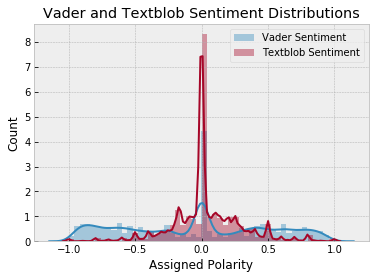

In [19]:
# Comparing the distributions of sentiment
sns.distplot(blm_tweets['vader_sent'], label='Vader Sentiment', axlabel='Sentiment')
sns.distplot(blm_tweets['textblob_sent'], label='Textblob Sentiment', axlabel='Sentiment')
plt.legend()
plt.title('Vader and Textblob Sentiment Distributions')
plt.xlabel('Assigned Polarity')
plt.ylabel('Count')
plt.show()

From the distributions above we can see that there is a similar spread, it seems that Vader is more likely to assign polarity even though both are centered around 0, textblob has a majority of the assigned sentiment to be centered around 0 while Vader is more like to assign not 0. 

In [20]:
blm_tweets['avg_sent'] = (blm_tweets['vader_sent'] + blm_tweets['textblob_sent'])/2
blm_tweets['avg_sent'].describe()

count    220504.000000
mean         -0.006755
std           0.352523
min          -0.994250
25%          -0.286618
50%           0.000000
75%           0.250000
max           0.979500
Name: avg_sent, dtype: float64

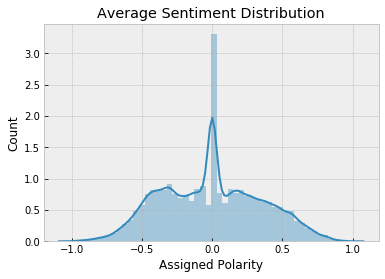

In [21]:
# Distribution of the average of the two sentiment scores
sns.distplot(blm_tweets['avg_sent'], label='Average Sentiment')
plt.title('Average Sentiment Distribution')
plt.xlabel('Assigned Polarity')
plt.ylabel('Count')
plt.show()

### Time Analysis

<a id="Section3b"></a>
Looking at the tweets over time and aligning the data with the more publicized events.

In [22]:
from datetime import datetime

In [23]:
blm_tweets['date'] = pd.to_datetime(blm_tweets['date'], format='%Y-%m-%d', errors='coerce')
blm_tweets.head()

date                                           hashtags  \
0 2020-06-24 16:59:09                                           ['#blm']   
1 2020-06-24 16:52:19                   ['#poem', '#motivation', '#blm']   
2 2020-06-24 16:47:56                                           ['#blm']   
3 2020-06-24 16:46:02                                           ['#blm']   
4 2020-06-24 16:43:54  ['#auspol', '#blm', '#racismeantiblancs', '#vi...   

   nlikes                                              tweet         username  \
0    20.0                        NO JUSTICE, NO PEACE #BLM        satanic_syd   
1   206.0  Funny thing\nAbout life is\nYou’ll always be t...   derickijohnson   
2    23.0  PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...  AngelofLightLit   
3   147.0  My kid wrote #blm in chalk on my driveway and ...      Majhatesall   
4    24.0  Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...      CaroDiRusso   

                                         tweet_punct  \
0                          NO JUSTICE NO PEACE BLM     
1  Funny thing\nAbout life is\nYou’ll always be t...   
2  PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...   
3  My kid wrote blm in chalk on my driveway and I...   
4  Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...   

                                     tweet_tokenized  \
0        ['no', 'justice', 'no', 'peace', 'blm', '']   
1  ['funny', 'thing', 'about', 'life', 'is', 'you...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   

                                       tweet_nonstop  \
0                    ['justice', 'peace', 'blm', '']   
1  ['funny', 'thing', 'life', 'always', 'one', 'e...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   

                                       tweet_stemmed  \
0                      ['justic', 'peac', 'blm', '']   
1  ['funni', 'thing', 'life', 'alway', 'one', 'el...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...   
4  ['genuflect', 'prostrat', 'repent', 'repeat', ...   

                                    tweet_lemmatized  len  year month  \
0                    ['justice', 'peace', 'blm', '']   27  2020    06   
1  ['funny', 'thing', 'life', 'always', 'one', 'e...  264  2020    06   
2  ['protect', 'black', 'woman', 'protect', 'blac...   65  2020    06   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...  278  2020    06   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   96  2020    06   

   vader_sent  textblob_sent  avg_sent  
0      0.7845       0.000000  0.392250  
1      0.9081       0.366667  0.637383  
2      0.7783      -0.166667  0.305817  
3      0.0000       0.100000  0.050000  
4      0.0000       0.000000  0.000000

In [24]:
blm_tweets.year.value_counts()

2020    197774
2017      9304
2016      5747
2013      3692
2014      1605
2019      1431
2015       839
2018       112
Name: year, dtype: int64

In [25]:
blm_tweets['year'] = pd.to_numeric(blm_tweets['year'], errors='coerce')
blm_tweets.dtypes

date                datetime64[ns]
hashtags                    object
nlikes                     float64
tweet                       object
username                    object
tweet_punct                 object
tweet_tokenized             object
tweet_nonstop               object
tweet_stemmed               object
tweet_lemmatized            object
len                          int64
year                         int64
month                       object
vader_sent                 float64
textblob_sent              float64
avg_sent                   float64
dtype: object

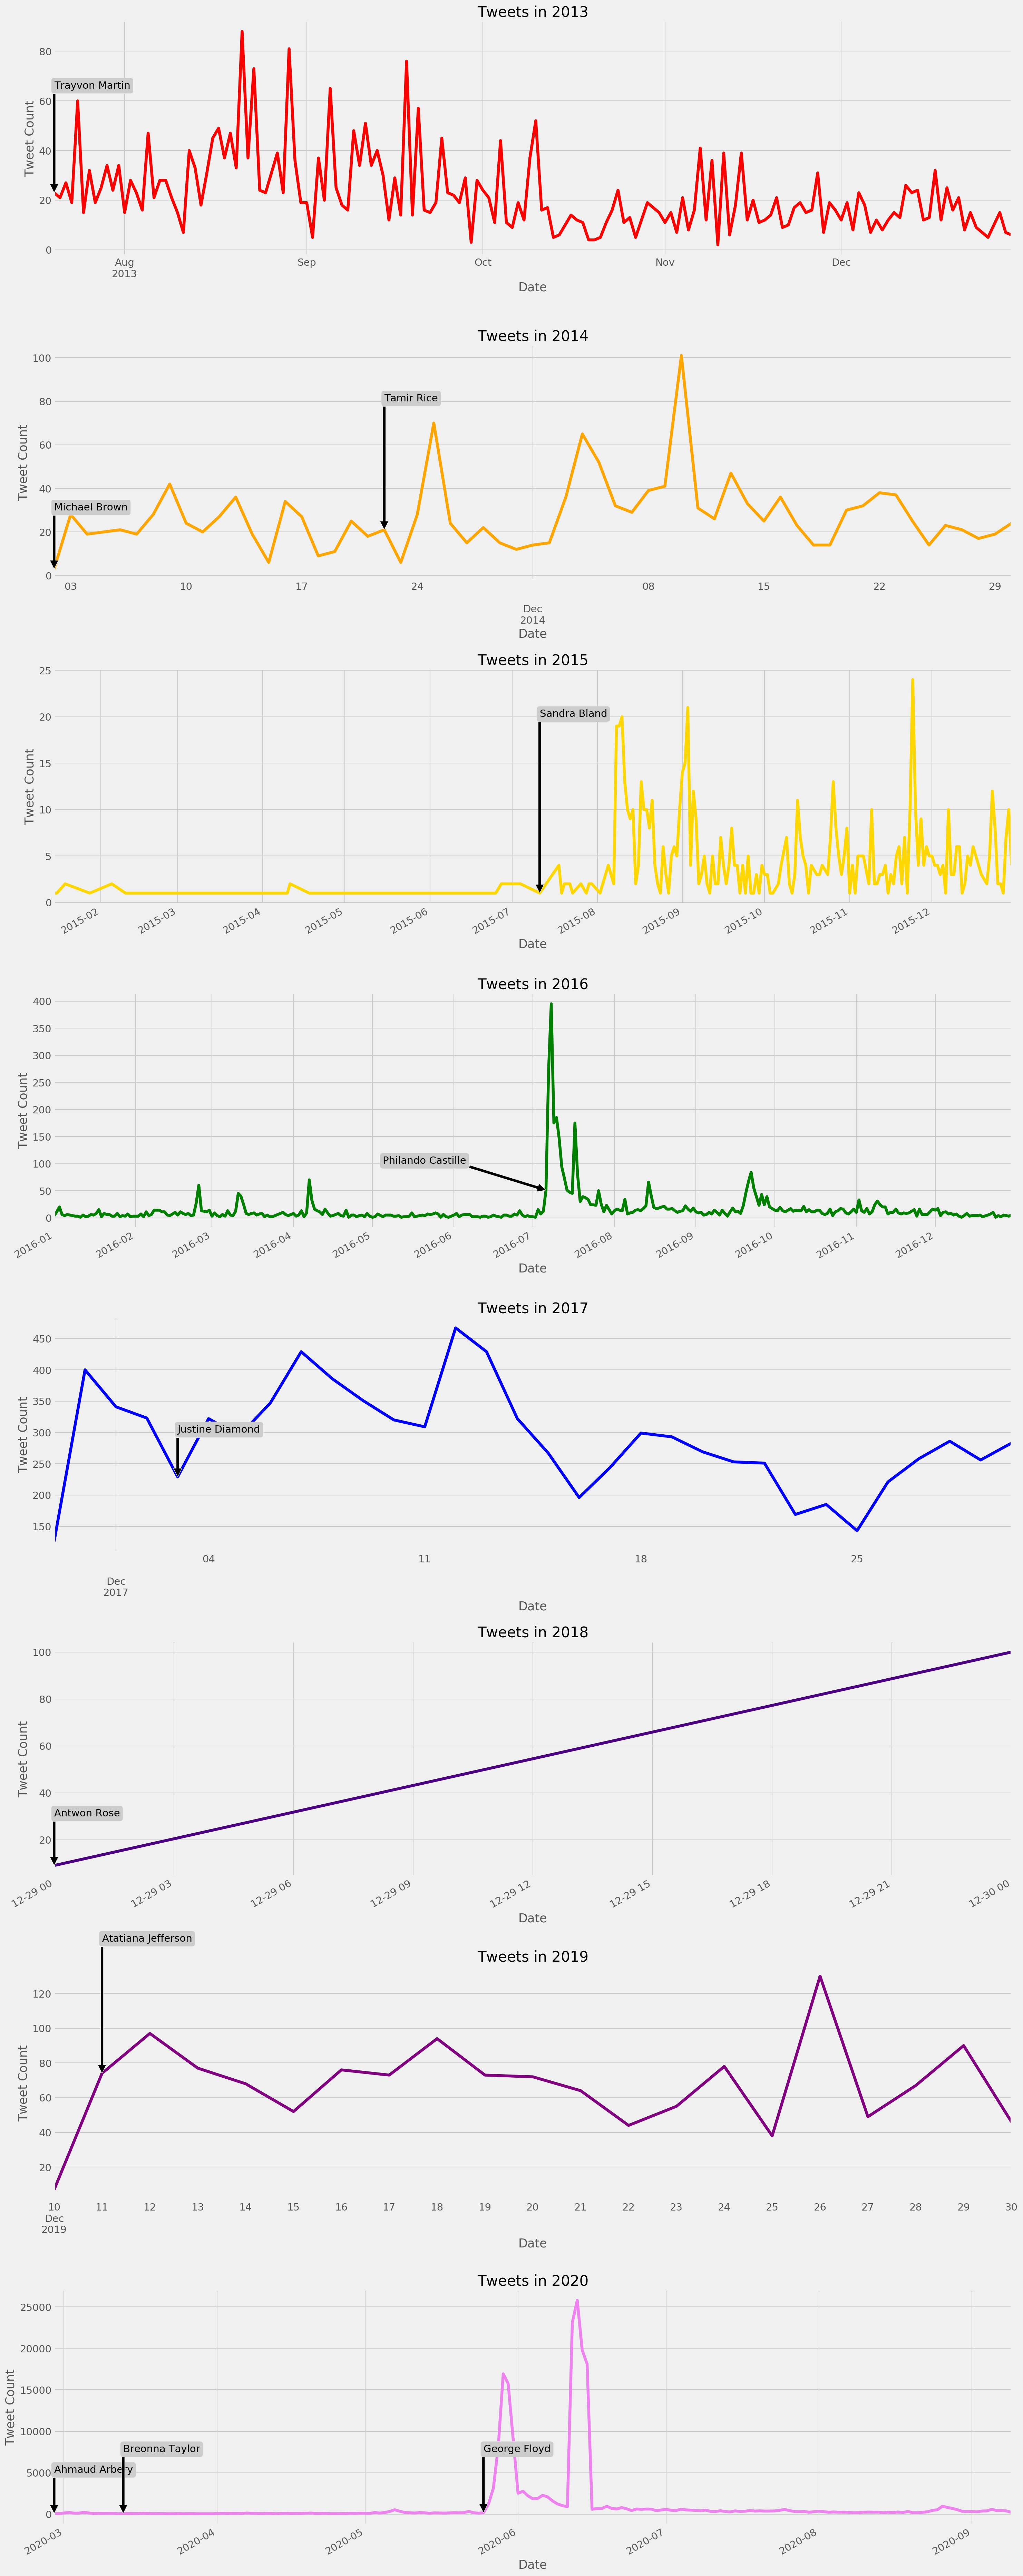

In [26]:
# This plot was too large to include in this notebook so I will just show it with an image
from IPython.display import Image
Image(filename='Tweets over time.jpg')

In [27]:
# Pivot table to look at sentiment comparing months and years
piv = pd.pivot_table(blm_tweets, index=['month'], columns = ['year'], values = ['avg_sent'])
piv.head()

avg_sent                                                  
year      2013 2014      2015      2016 2017 2018 2019      2020
month                                                           
01         NaN  NaN  0.296388  0.008353  NaN  NaN  NaN       NaN
02         NaN  NaN  0.220551  0.003445  NaN  NaN  NaN -0.046753
03         NaN  NaN -0.050062 -0.070840  NaN  NaN  NaN -0.069533
04         NaN  NaN -0.053781 -0.039027  NaN  NaN  NaN -0.069022
05         NaN  NaN -0.071031 -0.003586  NaN  NaN  NaN -0.053663

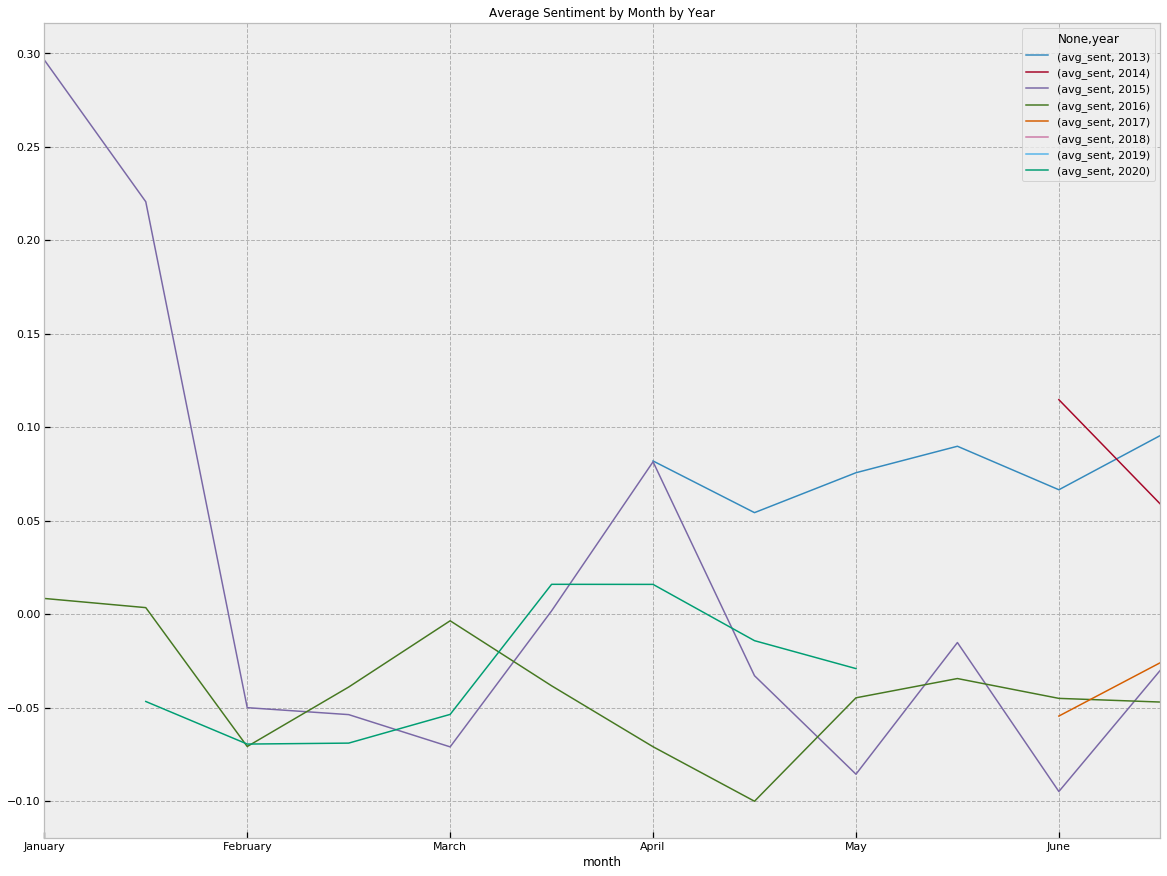

In [28]:
sns.set_context('notebook')
ax = piv.plot(figsize=(20,15))
ax.set_title('Average Sentiment by Month by Year')
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

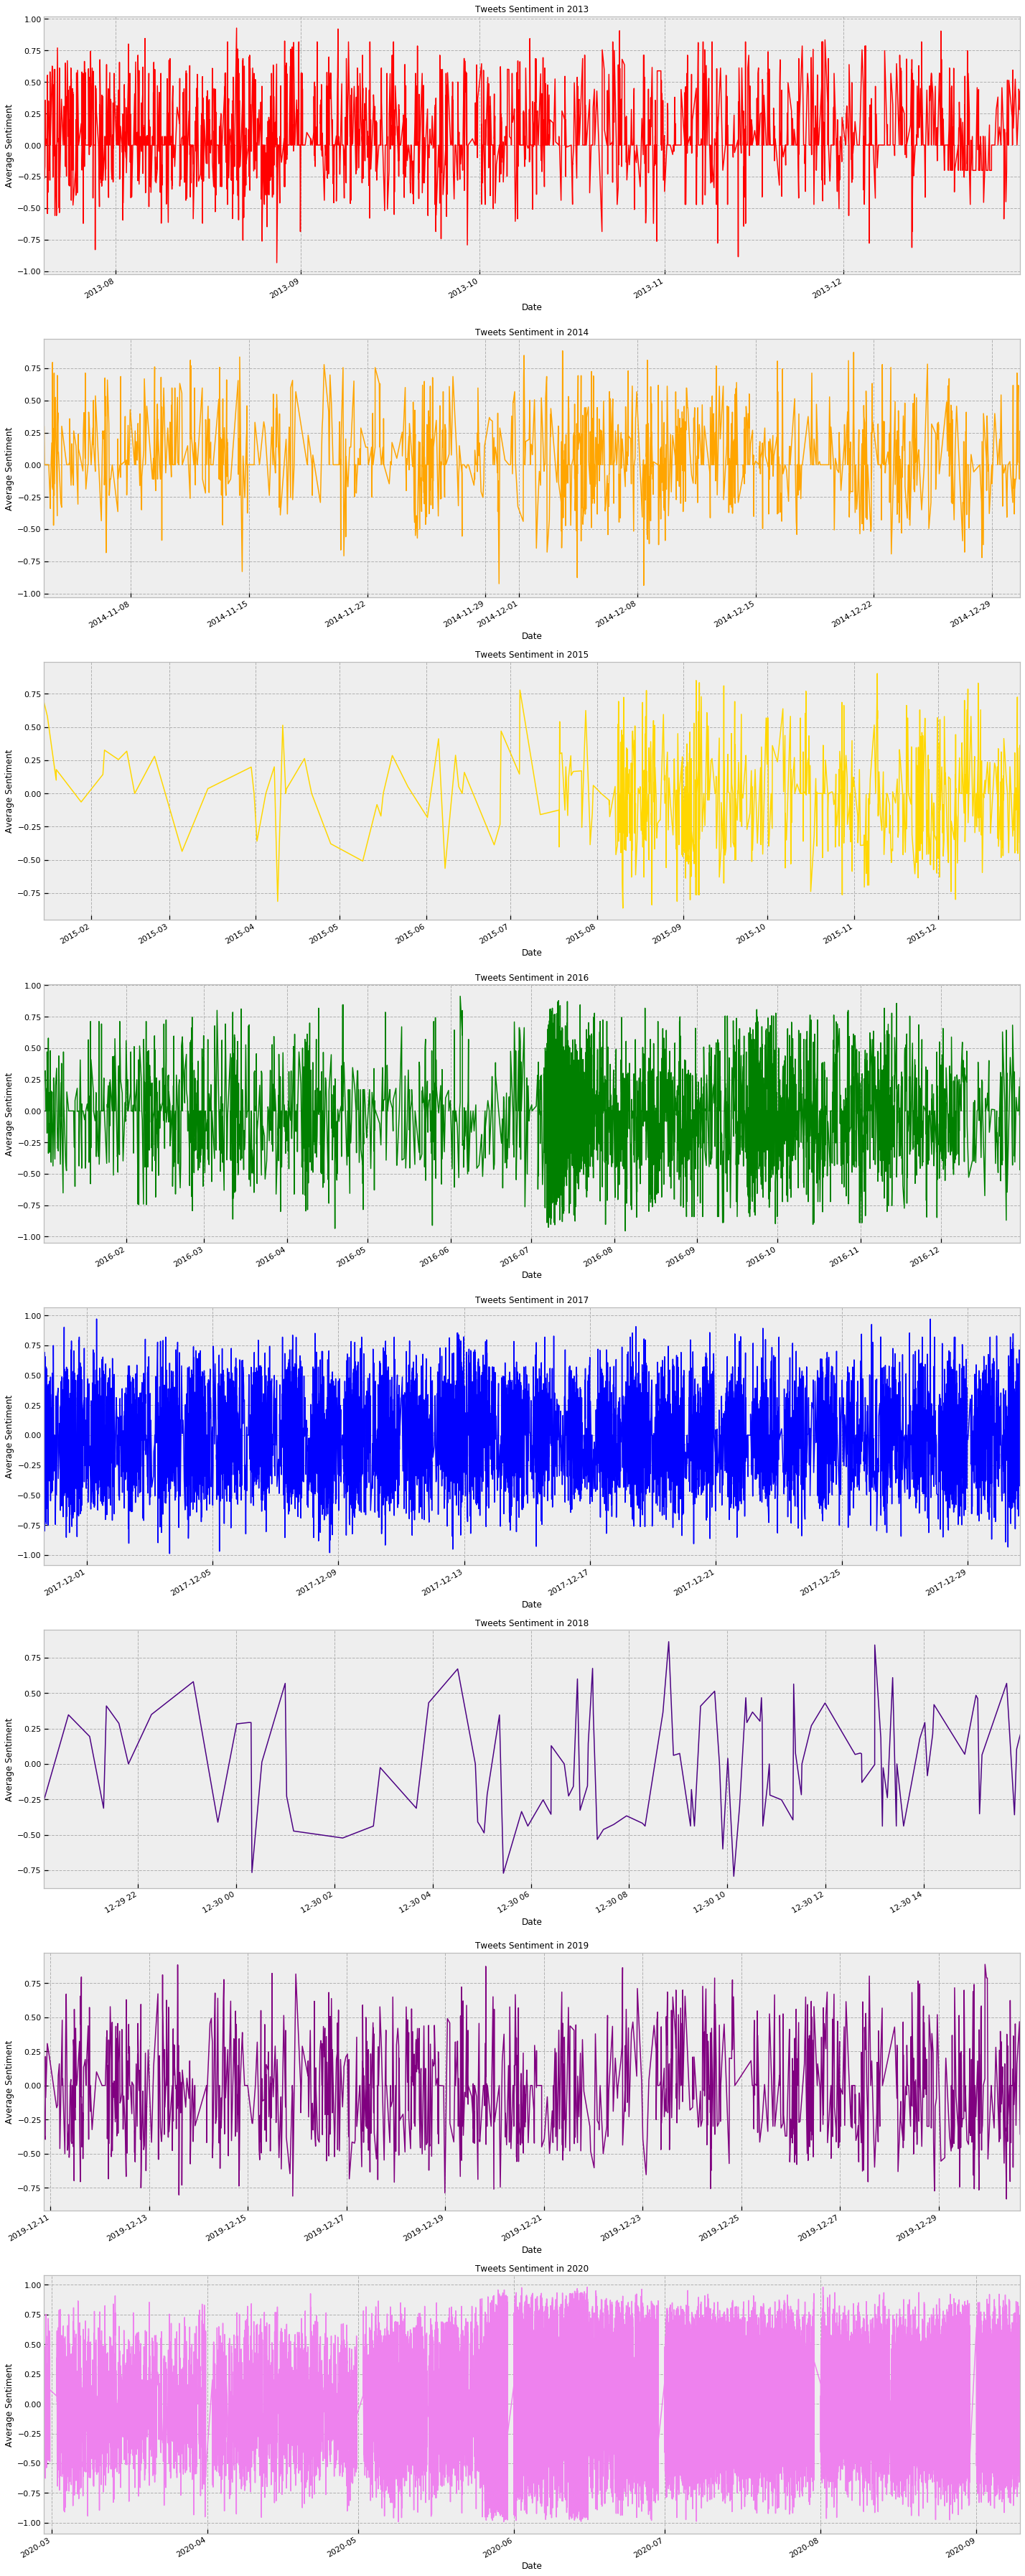

In [29]:
# Plotting the average sentiment per year
matplotlib.style.use('seaborn-colorblind')
bbox = dict(boxstyle="round", fc="0.8")
fig, (ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20) = plt.subplots(8, 1)
blm_tweets[blm_tweets['year'] == 2013].groupby('date')['avg_sent'].mean().plot(ax=ax13, color='red')
blm_tweets[blm_tweets['year'] == 2014].groupby('date')['avg_sent'].mean().plot(ax=ax14, color='orange')
blm_tweets[blm_tweets['year'] == 2015].groupby('date')['avg_sent'].mean().plot(ax=ax15, color='gold')
blm_tweets[blm_tweets['year'] == 2016].groupby('date')['avg_sent'].mean().plot(ax=ax16, color='green')
blm_tweets[blm_tweets['year'] == 2017].groupby('date')['avg_sent'].mean().plot(ax=ax17, color='blue')
blm_tweets[blm_tweets['year'] == 2018].groupby('date')['avg_sent'].mean().plot(ax=ax18, color='indigo')
blm_tweets[blm_tweets['year'] == 2019].groupby('date')['avg_sent'].mean().plot(ax=ax19, color='purple')
blm_tweets[blm_tweets['year'] == 2020].groupby('date')['avg_sent'].mean().plot(ax=ax20, color='violet')

ax13.set_title('Tweets Sentiment in 2013')
ax13.set_xlabel('Date')
ax13.set_ylabel('Average Sentiment')
#ax13.annotate("Trayvon Martin", xy=('2013-07-20', 23), xytext=('2013-07-20', 65), arrowprops=dict(facecolor='black'), bbox=bbox)

ax14.set_title('Tweets Sentiment in 2014')
ax14.set_xlabel('Date')
ax14.set_ylabel('Average Sentiment')
#ax14.annotate("Michael Brown", xy=('2014-11-02', 3), xytext=('2014-11-02', 30), arrowprops=dict(facecolor='black'), bbox=bbox)
#ax14.annotate("Tamir Rice", xy=('2014-11-22', 21), xytext=('2014-11-22', 80), arrowprops=dict(facecolor='black'), bbox=bbox)

ax15.set_title('Tweets Sentiment in 2015')
ax15.set_xlabel('Date')
ax15.set_ylabel('Average Sentiment')
#ax15.annotate("Sandra Bland", xy=('2015-07-11', 1), xytext=('2015-07-11', 20), arrowprops=dict(facecolor='black'),bbox=bbox)

ax16.set_title('Tweets Sentiment in 2016')
ax16.set_xlabel('Date')
ax16.set_ylabel('Average Sentiment')
#ax16.annotate("Philando Castille", xy=('2016-07-06', 51), xytext=('2016-05-05', 100), arrowprops=dict(facecolor='black'), bbox=bbox)

ax17.set_title('Tweets Sentiment in 2017')
ax17.set_xlabel('Date')
ax17.set_ylabel('Average Sentiment')
#ax17.annotate('Justine Diamond', xy=('2017-12-03', 229), xytext=('2017-12-03', 300), arrowprops=dict(facecolor='black'), bbox=bbox)

ax18.set_title('Tweets Sentiment in 2018')
ax18.set_xlabel('Date')
ax18.set_ylabel('Average Sentiment')
#ax18.annotate('Antwon Rose', xy=('2018-12-29', 9 ), xytext=('2018-12-29', 30), arrowprops=dict(facecolor='black'), bbox=bbox)


ax19.set_title('Tweets Sentiment in 2019')
ax19.set_xlabel('Date')
ax19.set_ylabel('Average Sentiment')
#ax19.annotate("Atatiana Jefferson", xy=('2019-12-11', 74), xytext=('2019-12-11', 150), arrowprops=dict(facecolor='black'), bbox=bbox)

ax20.set_title('Tweets Sentiment in 2020')
ax20.set_xlabel('Date')
ax20.set_ylabel('Average Sentiment')
#ax20.annotate("Ahmaud Arbery", xy=('2020-02-28', 74), xytext=('2020-02-28', 5000), arrowprops=dict(facecolor='black'), bbox=bbox)
#ax20.annotate("Breonna Taylor", xy=('2020-03-13', 78), xytext=('2020-03-13', 7500), arrowprops=dict(facecolor='black'), bbox=bbox)
#ax20.annotate("George Floyd", xy=('2020-05-25', 178), xytext=('2020-05-25', 7500), arrowprops=dict(facecolor='black'), bbox=bbox)


fig.set_figheight(50)
fig.set_figwidth(20)
fig.tight_layout()
plt.show()

Realizing the Sentiment doesn't necessarily equate how people are feeling or towards BLM or what the message is that BLM is trying to make via Twitter. For that I need to look deeper at the words being used. 

### Word Analysis

<a id="Section3c"></a>

In [30]:
def get_top_n_words(corpus, n=None):
    '''This function takes in two inputs, the corpus or the text and n. It runs through the corpus and counts the frequency and reports back the top n words used in the corpus.'''
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [31]:
common_words = get_top_n_words(blm_tweets['tweet_lemmatized'], 53)

In [32]:
# Removing the search word blm
common_words = common_words[1:53]

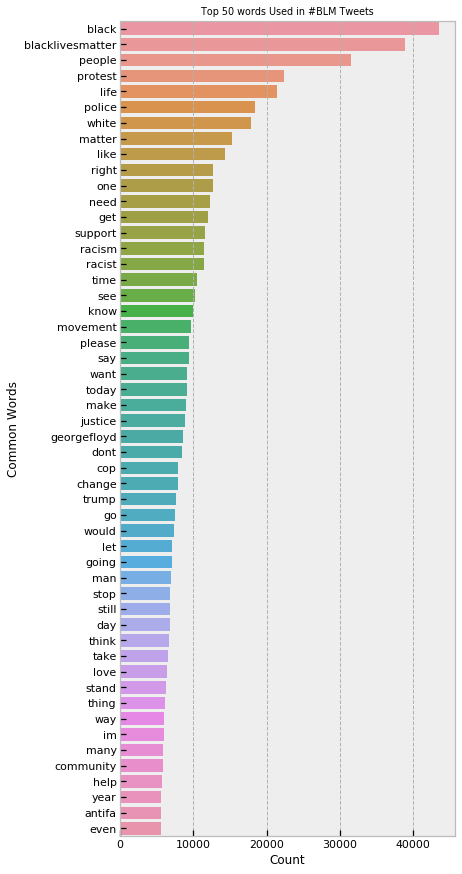

In [33]:
top_words_df = pd.DataFrame(common_words, columns = ['TweetText', 'count'])
f, ax = plt.subplots(figsize = (6, 15))
sns.set_context('paper')

sns.barplot(x =top_words_df['count'] , y = top_words_df['TweetText'])
plt.title('Top 50 words Used in #BLM Tweets')
plt.xlabel('Count')
plt.ylabel('Common Words')
plt.show()

This is helpful but also is missing the words in context. Next let's check out the bigrams to see what words are used most often together.

In [34]:
def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [35]:
common_bigrams = get_top_n_bigrams(blm_tweets['tweet_lemmatized'], 50)

In [36]:
bigrams_blm = common_bigrams[3:]

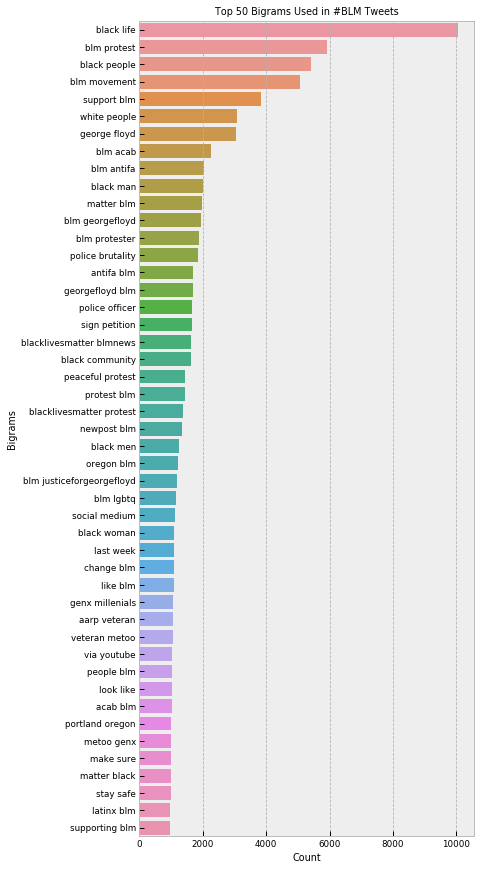

In [37]:
bigram_df2 = pd.DataFrame(bigrams_blm, columns = ['TweetText', 'count'])
f, ax = plt.subplots(figsize = (6, 15))
sns.set_context('paper')
sns.barplot(x =bigram_df2['count'] , y = bigram_df2['TweetText'])
plt.title('Top 50 Bigrams Used in #BLM Tweets')
plt.xlabel('Count')
plt.ylabel('Bigrams')
plt.show()

Finally to see if there's more to uncover with context, let's look at trigrams to see the most common 3 words used next to each other.

In [38]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return words_freq[:n]

In [39]:
trigrams = get_top_n_trigram(blm_tweets['tweet_lemmatized'], 50)

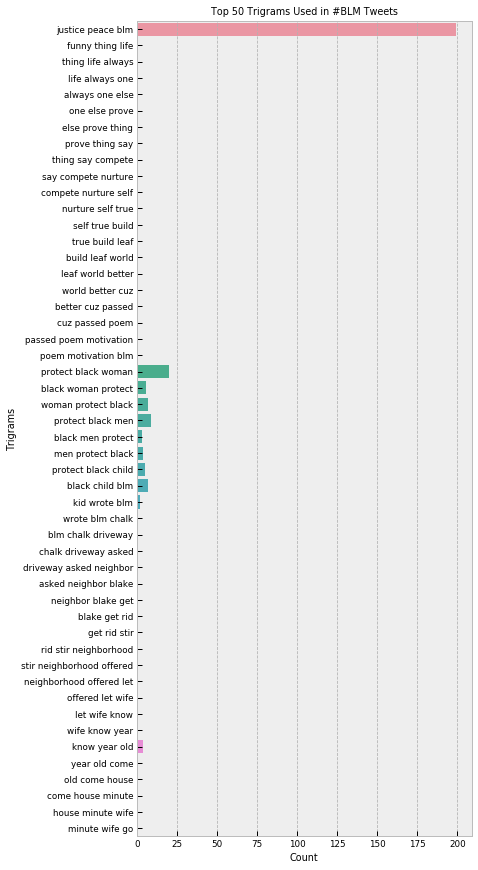

In [40]:
trigram_df = pd.DataFrame(trigrams, columns = ['TweetText', 'count'])
f, ax = plt.subplots(figsize = (6, 15))
sns.set_context('paper')
sns.barplot(x =trigram_df['count'] , y = trigram_df['TweetText'])
plt.title('Top 50 Trigrams Used in #BLM Tweets')
plt.xlabel('Count')
plt.ylabel('Trigrams')
plt.show()

Comparing the top words, bigrams and trigrams is interesting to see what is reoccuring. 

## 4. Model the Data

<a id="Section4"></a>

### Latent Semantic Analysis

The first modeling is using Latent Semantic Analysis

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from collections import Counter
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
def remove_blm(text):
    '''The input is any text and the output the word blm since it was the search word.'''
    text = re.sub(r"blm\S+","", text)
    return text

In [43]:
blm_tweets['tweet_lemmatized_no_blm'] = blm_tweets['tweet_lemmatized'].apply(lambda x: remove_blm(x))

In [44]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = blm_tweets['tweet_lemmatized_no_blm']

In [45]:
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [46]:

def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix'''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their accompanying magnitudes for a given list of keys'''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    return a list of n_topic strings, where each string contains the n most common
    words in a predicted category, in order'''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))
    return top_words

In [47]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [48]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  black people life
Topic 2:  matter life black
Topic 3:  blacklivesmatter georgefloyd justiceforgeorgefloyd
Topic 4:  resist retweet hello
Topic 5:  protest today peaceful
Topic 6:  protest police people


In [49]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

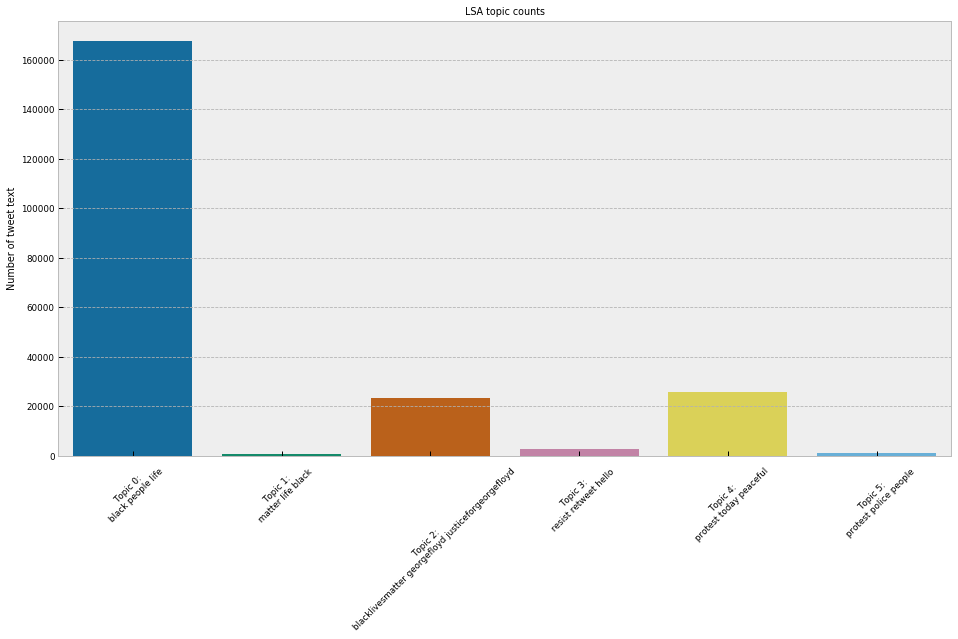

In [50]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(lsa_categories, lsa_counts)
ax.set_xticks(lsa_categories)
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel('Number of tweet text')
ax.set_title('LSA topic counts')
plt.show()

In [51]:
blm_tweets_polarized = blm_tweets[blm_tweets['avg_sent'] != 0.0]
blm_tweets_polarized['positivity'] = np.where(blm_tweets_polarized['avg_sent'] > 0, 1, 0)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(blm_tweets_polarized['tweet_lemmatized'], blm_tweets_polarized['positivity'], test_size=0.2, random_state=1337)

In [53]:
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    '''Takes the inputs of pipeline, x-train, y-train, x-test, and y-test and returns the accuracy score for the model fit'''
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [54]:
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight='balanced')
n_features = np.arange(10000, 50001, 10000)

def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1,1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print('Test result for {} features'.format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n, nfeature_accuracy))
    return result
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf, ngram_range=(1,3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(class_weight='balanced')


Test result for 10000 features
accuracy score: 85.75%
Test result for 20000 features
accuracy score: 86.02%
Test result for 30000 features
accuracy score: 85.70%
Test result for 40000 features
accuracy score: 85.88%
Test result for 50000 features
accuracy score: 85.86%


In [55]:
cv = CountVectorizer(max_features=40000, ngram_range=(1,3))
pipeline = Pipeline([
    ('vectorizer', cv),
    ('classifier', rf)
])
sentiment_fit = pipeline.fit(X_train,y_train)
y_pred = sentiment_fit.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.85      0.89      0.87     20075
    positive       0.88      0.84      0.86     19280

    accuracy                           0.87     39355
   macro avg       0.87      0.87      0.87     39355
weighted avg       0.87      0.87      0.87     39355



In [56]:
tfidf = TfidfVectorizer(max_features=40000, ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(blm_tweets_polarized['tweet_lemmatized'])
y = blm_tweets_polarized['positivity']
chi2score = chi2(X_tfidf, y)[0]

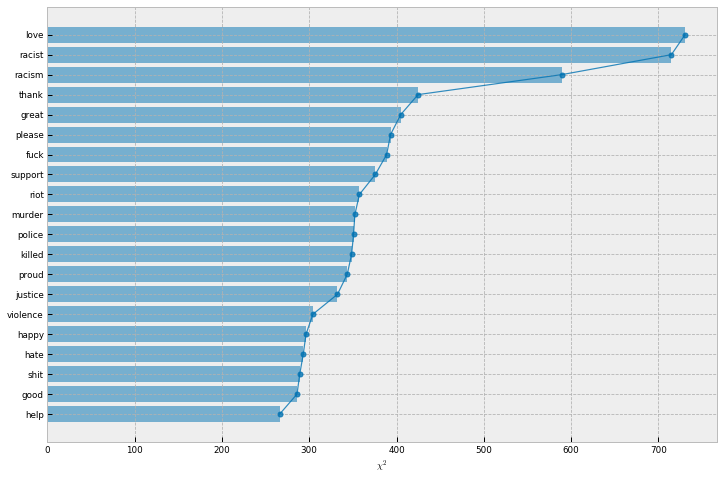

In [57]:
plt.figure(figsize=(12,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show()

From the Chi-square test we can see that the top words that influenced the sentiment were "love, racist, racism, thank, great, please, fuck, support" etc.

### Latent Dirichlet Allocation

The second modeling is done using the Latent Direchlet Allocation

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.colors as mcolors
from collections import Counter

In [59]:
# Creating an instance for LDA
lda = LDA(n_components = 4, random_state = 1)

In [60]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(blm_tweets['tweet_lemmatized_no_blm'])

print('Fitting the vectorizer with the LDA')
lda.fit(count_data)

Fitting the vectorizer with the LDA


LatentDirichletAllocation(n_components=4, random_state=1)

In [61]:
print('Number of topics: ', len(lda.components_))
print('Number of columns of the lda fit: ', len(lda.components_[0]))

Number of topics:  4
Number of columns of the lda fit:  154131


In [62]:
feature = count_vectorizer.get_feature_names()
print('Length of feature names: ', len(feature))

Length of feature names:  154131


In [63]:
for ind, topic in enumerate(lda.components_):
    print('Top 50 words in topic {}'.format(ind))
    print('-'*25)
    top_50 = topic.argsort()[-50:]
    print([feature[i] for i in top_50], '\n\n')

Top 50 words in topic 0
-------------------------
['friend', 'got', 'community', 'killed', 'year', 'world', 'fight', 'officer', 'justice', 'use', 'fuck', 'feel', 'help', 'life', 'racism', 'love', 'shit', 'good', 'really', 'acab', 'day', 'way', 'think', 'stand', 'let', 'stop', 'racist', 'movement', 'dont', 'thing', 'going', 'want', 'im', 'change', 'man', 'support', 'say', 'make', 'know', 'need', 'right', 'cop', 'time', 'protest', 'like', 'police', 'white', 'blacklivesmatter', 'black', 'people'] 


Top 50 words in topic 1
-------------------------
['sign', 'official', 'minneapolisriots', 'hear', 'mural', 'employee', 'riot', 'dont', 'people', 'thank', 'america', 'justiceforgeorgeflyod', 'love', 'ahmaudarbery', 'georgefloydmurder', 'georgefloydprotest', 'king', 'history', 'vote', 'street', 'trump', 'wear', 'movement', 'breonnataylor', 'blacklivesmatters', 'youtube', 'today', 'seattle', 'starbucks', 'georgefloydwasmurdered', 'icantbreathe', 'minneapolis', 'like', 'need', 'watch', 'newpost',

In [64]:
# Transform
blm_df_final = lda.transform(count_data)
print('Shape of the final dataframe: ', blm_df_final.shape)

Shape of the final dataframe:  (220504, 4)


In [65]:
prob = blm_df_final[0][blm_df_final[0].argmax()].round(2)
print('Tweet belong to the topic ', blm_df_final[0].argmax(), 'with the probability of ', prob)

Tweet belong to the topic  1 with the probability of  0.74


In [66]:
# Assigning the topcis to the dataframe
blm_tweets['topic'] = blm_df_final.argmax(axis=1)
blm_tweets.head()

date                                           hashtags  \
0 2020-06-24 16:59:09                                           ['#blm']   
1 2020-06-24 16:52:19                   ['#poem', '#motivation', '#blm']   
2 2020-06-24 16:47:56                                           ['#blm']   
3 2020-06-24 16:46:02                                           ['#blm']   
4 2020-06-24 16:43:54  ['#auspol', '#blm', '#racismeantiblancs', '#vi...   

   nlikes                                              tweet         username  \
0    20.0                        NO JUSTICE, NO PEACE #BLM        satanic_syd   
1   206.0  Funny thing\nAbout life is\nYou’ll always be t...   derickijohnson   
2    23.0  PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...  AngelofLightLit   
3   147.0  My kid wrote #blm in chalk on my driveway and ...      Majhatesall   
4    24.0  Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...      CaroDiRusso   

                                         tweet_punct  \
0                          NO JUSTICE NO PEACE BLM     
1  Funny thing\nAbout life is\nYou’ll always be t...   
2  PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...   
3  My kid wrote blm in chalk on my driveway and I...   
4  Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...   

                                     tweet_tokenized  \
0        ['no', 'justice', 'no', 'peace', 'blm', '']   
1  ['funny', 'thing', 'about', 'life', 'is', 'you...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   

                                       tweet_nonstop  \
0                    ['justice', 'peace', 'blm', '']   
1  ['funny', 'thing', 'life', 'always', 'one', 'e...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   

                                       tweet_stemmed  \
0                      ['justic', 'peac', 'blm', '']   
1  ['funni', 'thing', 'life', 'alway', 'one', 'el...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...   
4  ['genuflect', 'prostrat', 'repent', 'repeat', ...   

                                    tweet_lemmatized  len  year month  \
0                    ['justice', 'peace', 'blm', '']   27  2020    06   
1  ['funny', 'thing', 'life', 'always', 'one', 'e...  264  2020    06   
2  ['protect', 'black', 'woman', 'protect', 'blac...   65  2020    06   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...  278  2020    06   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   96  2020    06   

   vader_sent  textblob_sent  avg_sent  \
0      0.7845       0.000000  0.392250   
1      0.9081       0.366667  0.637383   
2      0.7783      -0.166667  0.305817   
3      0.0000       0.100000  0.050000   
4      0.0000       0.000000  0.000000   

                             tweet_lemmatized_no_blm  topic  
0                         ['justice', 'peace', ' '']      1  
1  ['funny', 'thing', 'life', 'always', 'one', 'e...      0  
2  ['protect', 'black', 'woman', 'protect', 'blac...      0  
3  ['kid', 'wrote', ' 'chalk', 'driveway', 'asked...      0  
4  ['genuflect', 'prostrate', 'repent', 'repeat',...      1

In [67]:
# Mapping topics with label
# Looking at the words used in each topic, I gave a label based on the commonality between the words used
topic_label = {0: 'Pro-BLM', 1: 'Names of People and Places', 2: 'Politics', 3: 'Anti-BLM'}

# Mapping the dictionary with the dataframe to get the labels
blm_tweets['topic_name'] = blm_tweets['topic'].map(topic_label)

blm_tweets.head()

date                                           hashtags  \
0 2020-06-24 16:59:09                                           ['#blm']   
1 2020-06-24 16:52:19                   ['#poem', '#motivation', '#blm']   
2 2020-06-24 16:47:56                                           ['#blm']   
3 2020-06-24 16:46:02                                           ['#blm']   
4 2020-06-24 16:43:54  ['#auspol', '#blm', '#racismeantiblancs', '#vi...   

   nlikes                                              tweet         username  \
0    20.0                        NO JUSTICE, NO PEACE #BLM        satanic_syd   
1   206.0  Funny thing\nAbout life is\nYou’ll always be t...   derickijohnson   
2    23.0  PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...  AngelofLightLit   
3   147.0  My kid wrote #blm in chalk on my driveway and ...      Majhatesall   
4    24.0  Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...      CaroDiRusso   

                                         tweet_punct  \
0                          NO JUSTICE NO PEACE BLM     
1  Funny thing\nAbout life is\nYou’ll always be t...   
2  PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...   
3  My kid wrote blm in chalk on my driveway and I...   
4  Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...   

                                     tweet_tokenized  \
0        ['no', 'justice', 'no', 'peace', 'blm', '']   
1  ['funny', 'thing', 'about', 'life', 'is', 'you...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   

                                       tweet_nonstop  \
0                    ['justice', 'peace', 'blm', '']   
1  ['funny', 'thing', 'life', 'always', 'one', 'e...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   

                                       tweet_stemmed  \
0                      ['justic', 'peac', 'blm', '']   
1  ['funni', 'thing', 'life', 'alway', 'one', 'el...   
2  ['protect', 'black', 'women', 'protect', 'blac...   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...   
4  ['genuflect', 'prostrat', 'repent', 'repeat', ...   

                                    tweet_lemmatized  len  year month  \
0                    ['justice', 'peace', 'blm', '']   27  2020    06   
1  ['funny', 'thing', 'life', 'always', 'one', 'e...  264  2020    06   
2  ['protect', 'black', 'woman', 'protect', 'blac...   65  2020    06   
3  ['kid', 'wrote', 'blm', 'chalk', 'driveway', '...  278  2020    06   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...   96  2020    06   

   vader_sent  textblob_sent  avg_sent  \
0      0.7845       0.000000  0.392250   
1      0.9081       0.366667  0.637383   
2      0.7783      -0.166667  0.305817   
3      0.0000       0.100000  0.050000   
4      0.0000       0.000000  0.000000   

                             tweet_lemmatized_no_blm  topic  \
0                         ['justice', 'peace', ' '']      1   
1  ['funny', 'thing', 'life', 'always', 'one', 'e...      0   
2  ['protect', 'black', 'woman', 'protect', 'blac...      0   
3  ['kid', 'wrote', ' 'chalk', 'driveway', 'asked...      0   
4  ['genuflect', 'prostrate', 'repent', 'repeat',...      1   

                   topic_name  
0  Names of People and Places  
1                     Pro-BLM  
2                     Pro-BLM  
3                     Pro-BLM  
4  Names of People and Places

In [68]:
# Visualization of the topics
def word_cloud2(topic):
    topic_words = [feature[i] for i in lda.components_[topic].argsort()[-50:]]
    cloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=2500, height=1800).generate(" ".join(topic_words))
    print('\nWordcloud for topic: ', topic, '\n')
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()


Wordcloud for topic:  0 



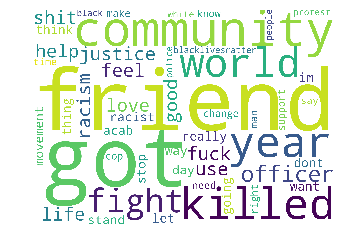

In [69]:
# Creating a wordcloud for topic 0
word_cloud2(0)


Wordcloud for topic:  1 



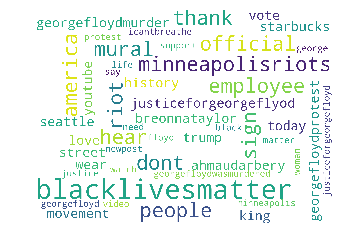

In [70]:
# Creating a wordcloud for topic 1
word_cloud2(1)


Wordcloud for topic:  2 



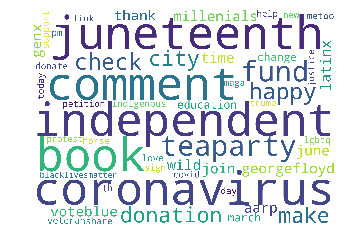

In [71]:
# Creating a wordcloud for topic 2
word_cloud2(2)


Wordcloud for topic:  3 



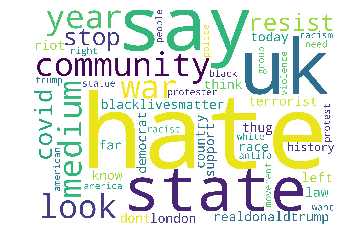

In [72]:
# Creating a wordcloud for topic 3
word_cloud2(3)

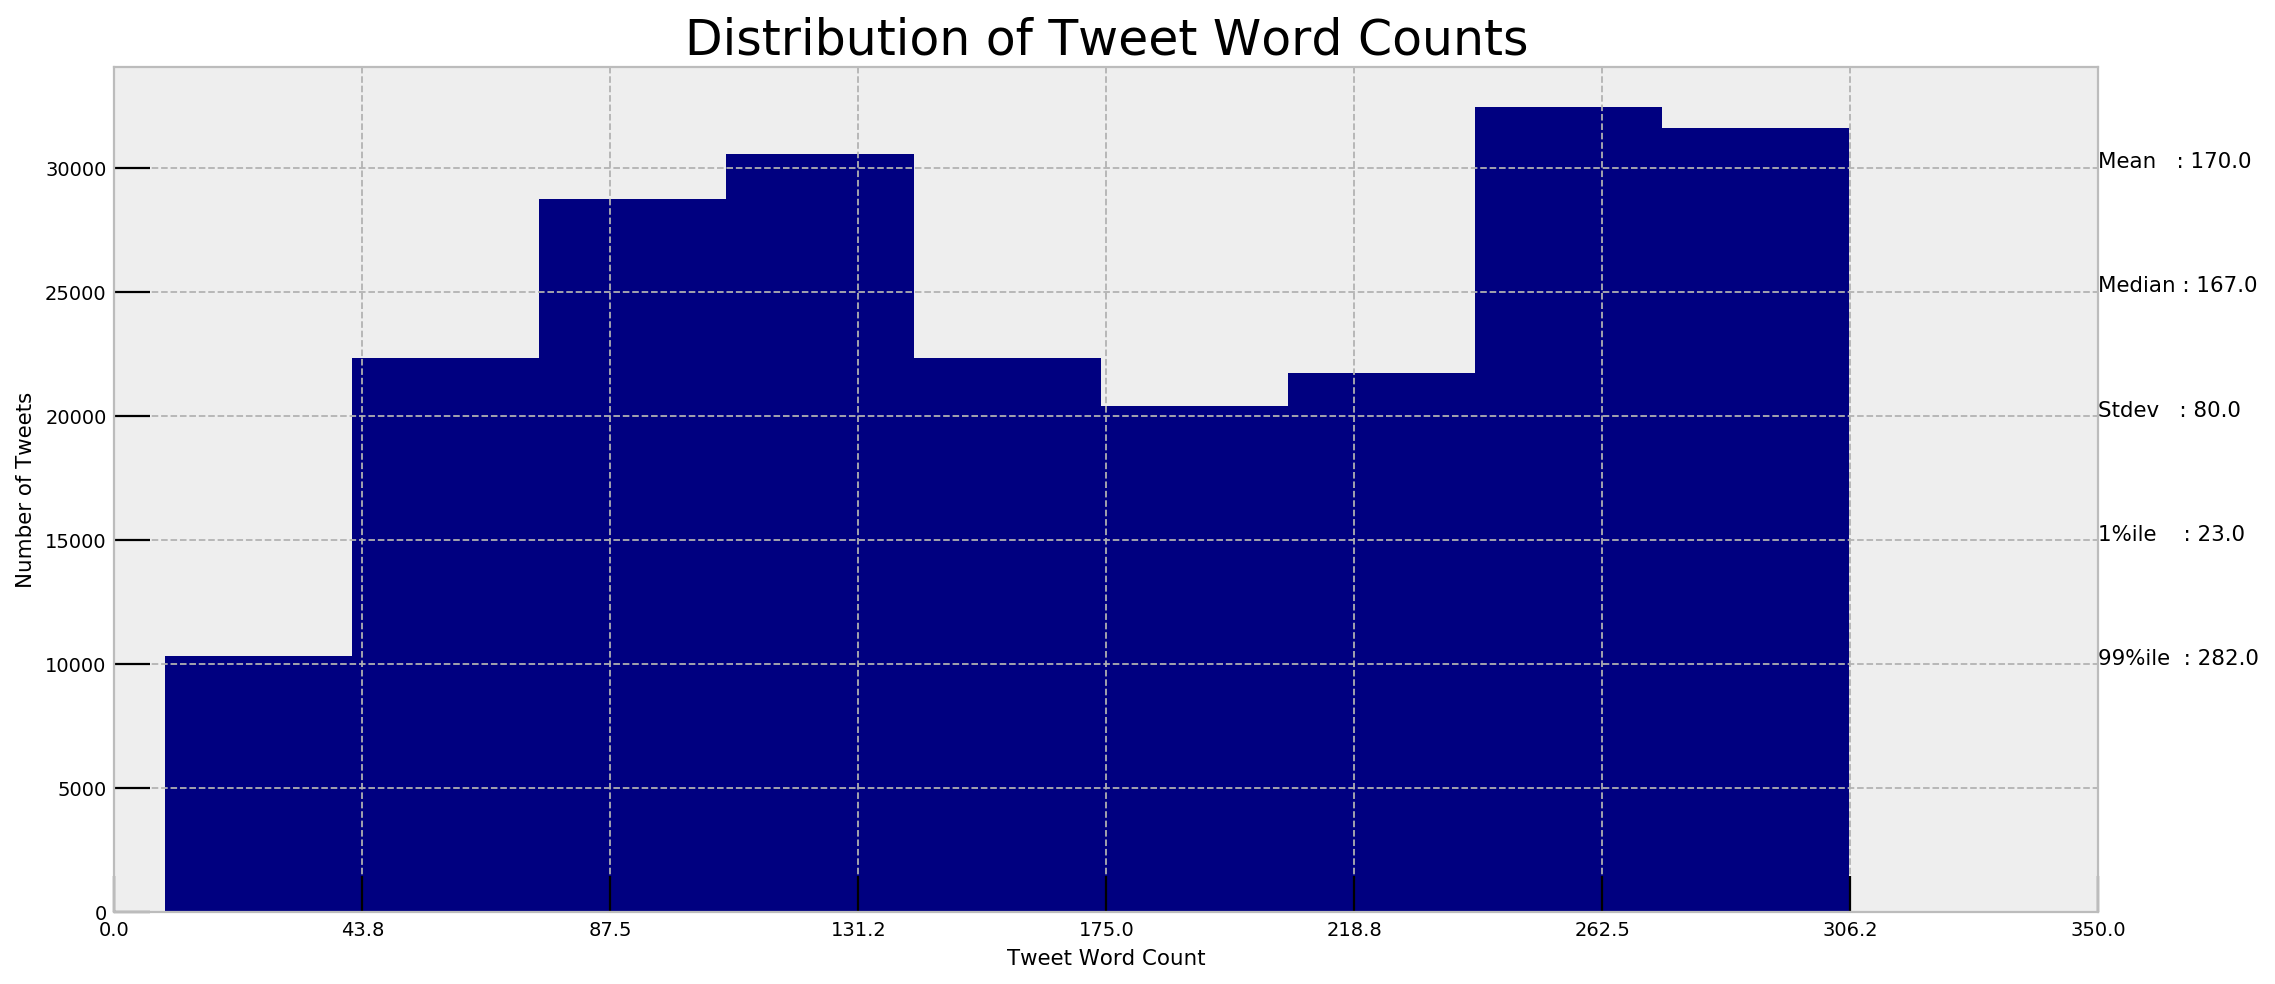

In [73]:
# Plotting tweet length distribution
plt.figure(figsize=(16,7), dpi=160)
plt.hist(blm_tweets['len'], color='navy')
plt.text(350, 30000, "Mean   : " + str(round(np.mean(blm_tweets['len']))))
plt.text(350,  25000, "Median : " + str(round(np.median(blm_tweets['len']))))
plt.text(350,  20000, "Stdev   : " + str(round(np.std(blm_tweets['len']))))
plt.text(350,  15000, "1%ile    : " + str(round(np.quantile(blm_tweets['len'], q=0.01))))
plt.text(350,  10000, "99%ile  : " + str(round(np.quantile(blm_tweets['len'], q=0.99))))

plt.gca().set(xlim=(0, 350), ylabel='Number of Tweets', xlabel='Tweet Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,350,9))
plt.title('Distribution of Tweet Word Counts', fontdict=dict(size=22))
plt.show()

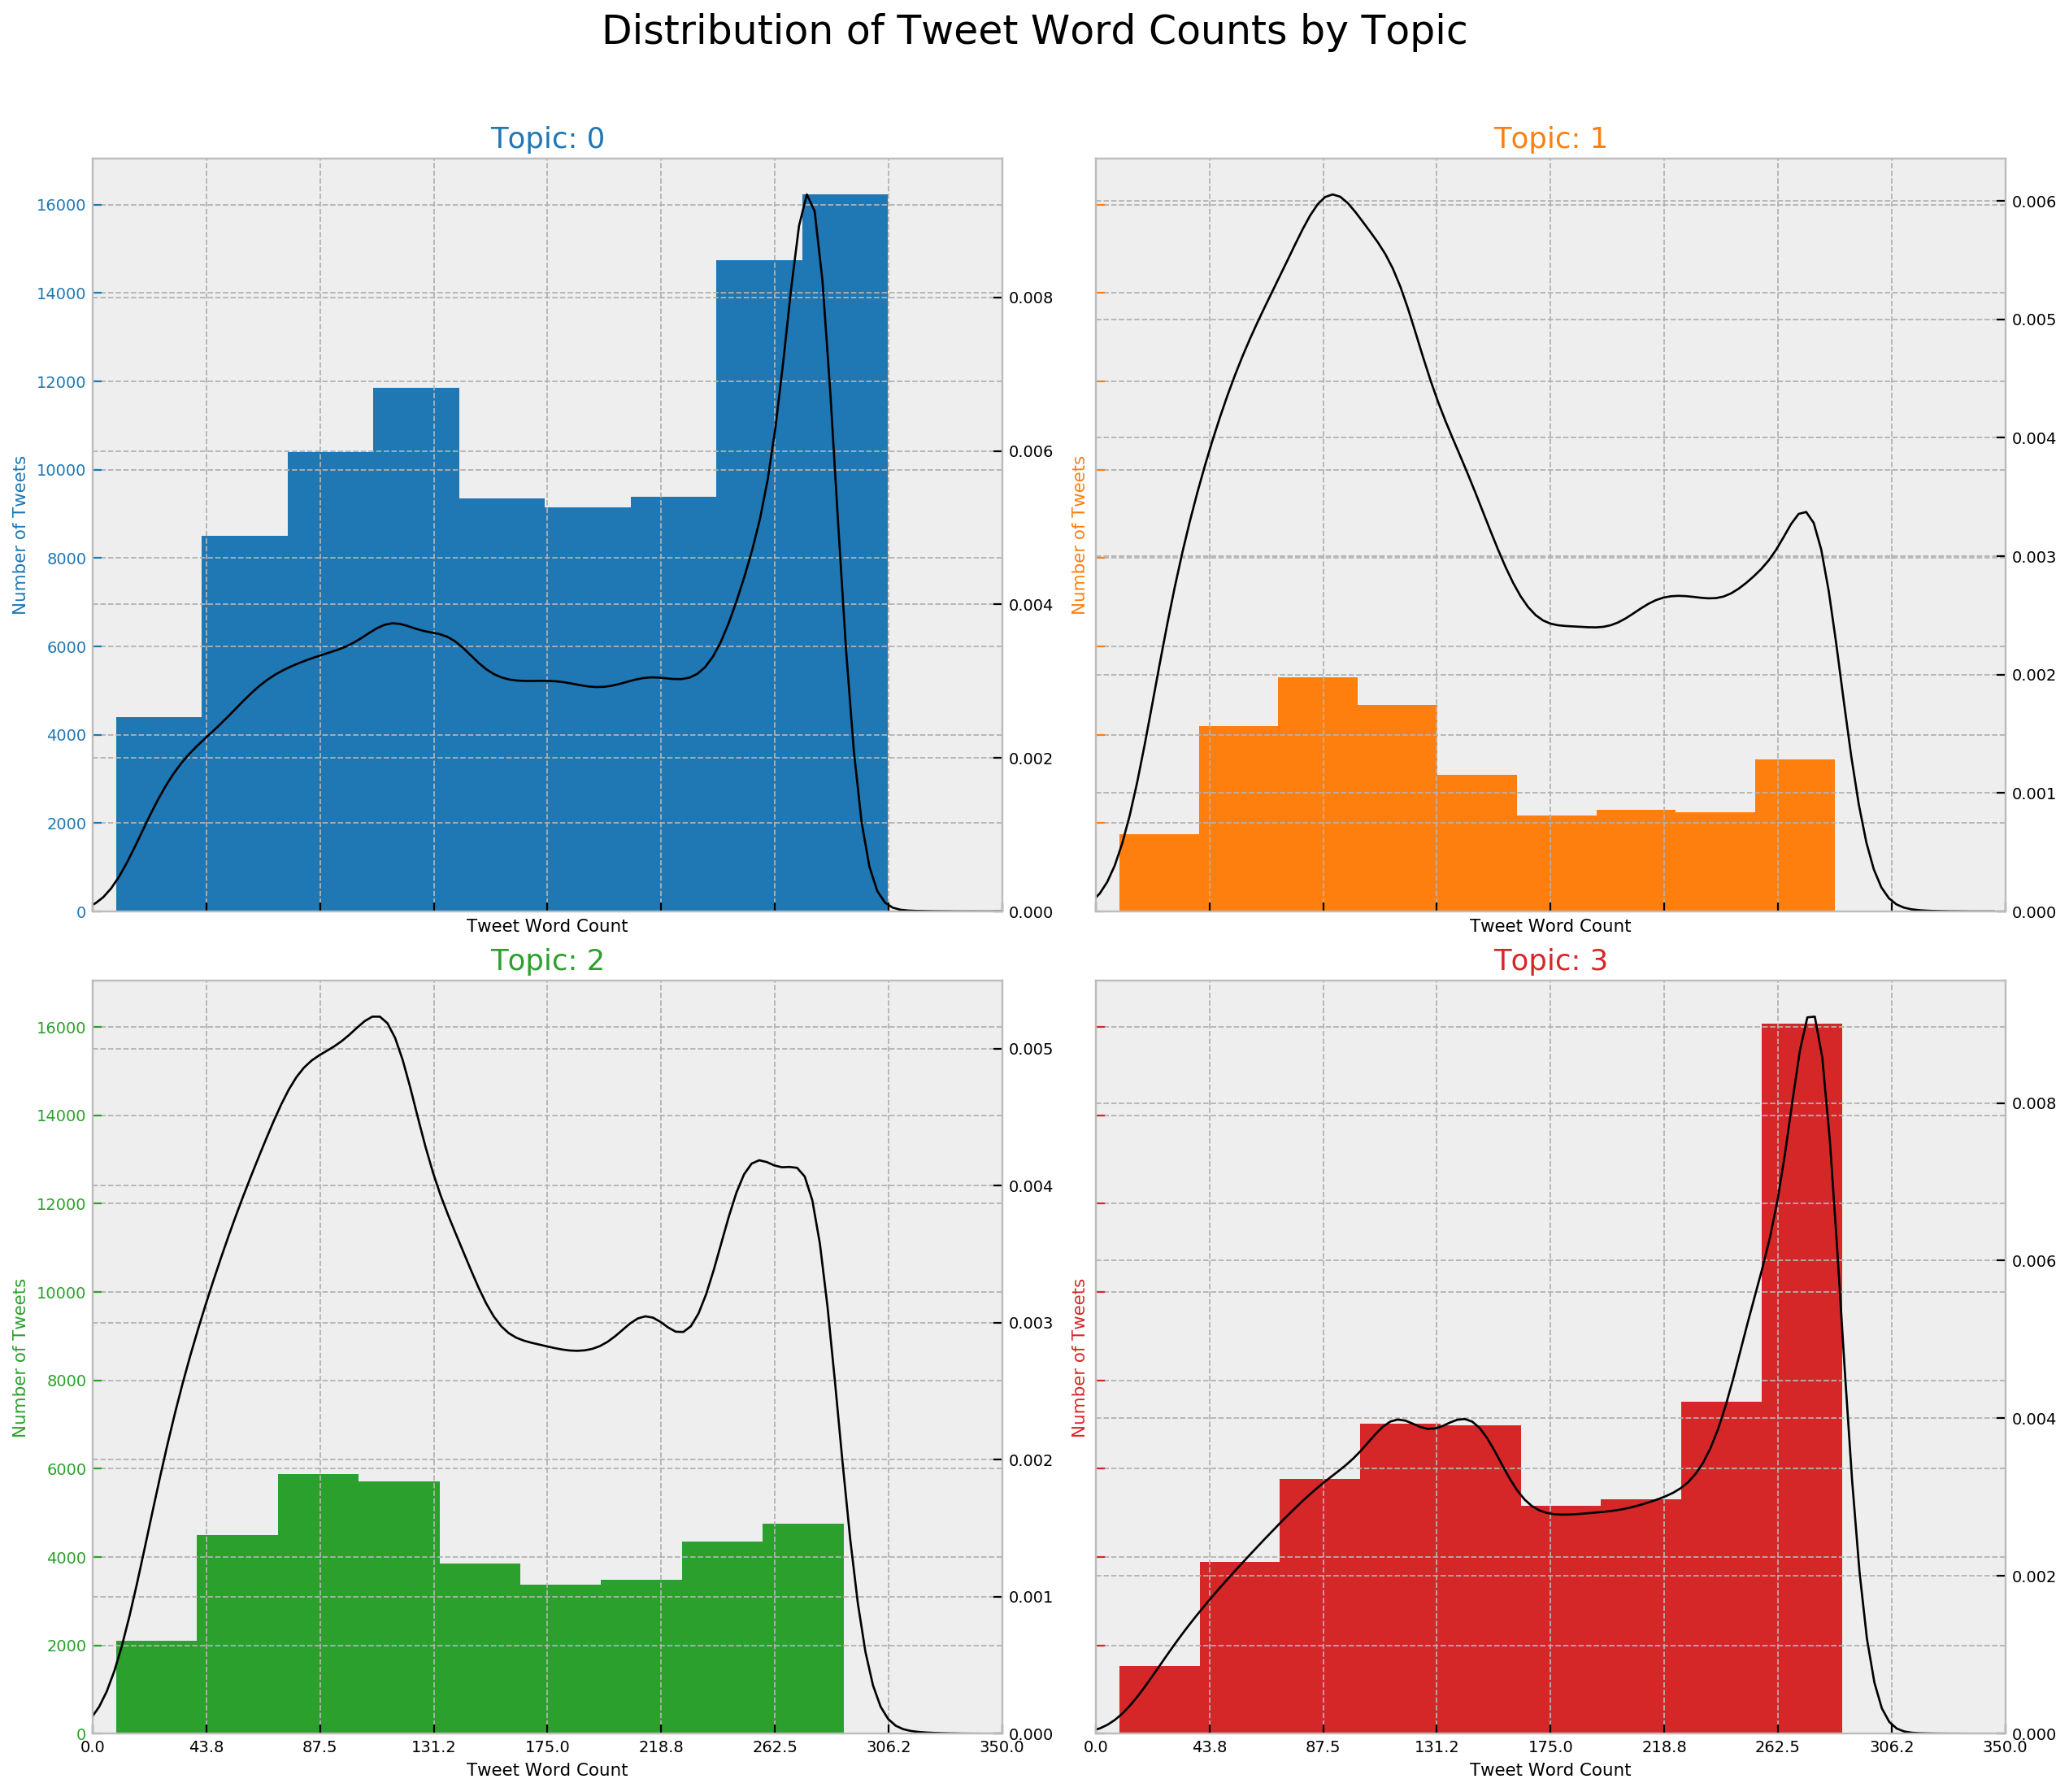

In [74]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = blm_tweets.loc[blm_tweets.topic == i, :]
    tweet_lens = [len(d) for d in df_dominant_topic_sub.tweet]
    ax.hist(tweet_lens, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(tweet_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 350), xlabel='Tweet Word Count')
    ax.set_ylabel('Number of Tweets', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,350,9))
fig.suptitle('Distribution of Tweet Word Counts by Topic', fontsize=22)
plt.show()

## 5. iNterpret the Data

<a id="Section5"></a>

We can see with both the LSA and the LDA that the main topics of tweets with the hashtag BLM are referencing protecting black lives, communities that have been affected, victims of police brutality, and peaceful protesting. There is a definite topic that centralizes on politics but that topic (number 2) has the least amount of tweets and the shortest tweets. Terrorism and antifa are not as highly correlated as I anticipated based on mainstream media. Along with that, the sentiment analysis was inconclusive because of the context of the tweets, you couldn't say based on the sentiment if a tweet was positive towards BLM or negative towards BLM.
Future work
- side by side comparing with major news outlets
- side by side comparing with politicians statements or tweets
- digging deeper into the engagement of these tweets with likes and retweets and seeing which tweets have more impact
